# Treinando Redes Neurais Profundas

In [1]:
from keras.datasets import mnist
from sklearn.model_selection import train_test_split

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 
import seaborn as sns

In [3]:
import tensorflow as tf

In [4]:
from tensorflow import keras
from tensorflow.keras.layers import Dense, Flatten, LeakyReLU, PReLU, BatchNormalization, Input, Concatenate, Dropout
from tensorflow.keras.models import Sequential

In [5]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

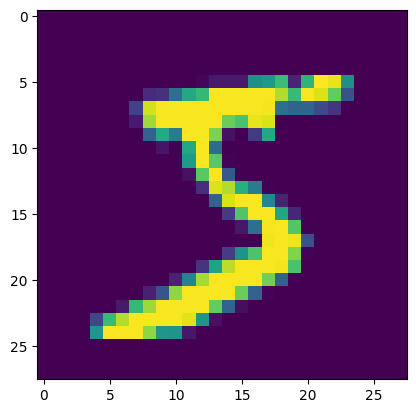

In [6]:
plt.imshow(x_train[0])

In [7]:
model = Sequential()
model.add(Flatten(input_shape=[28, 28]))
model.add(Dense(300, kernel_initializer="he_normal"))
model.add(LeakyReLU(alpha=0.2))
model.add(Dense(10, activation="softmax"))

In [8]:
model.compile(loss=keras.losses.sparse_categorical_crossentropy, metrics=["accuracy"], optimizer="adam")

In [9]:
lr_callback = tf.keras.callbacks.ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.1,
    patience=5,
    min_lr=0.0001
)
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test), callbacks=[lr_callback])

Epoch 1/10


ValueError: in user code:

    File "c:\Users\franc\Documents\Classes\Mãos à Obra Aprendizado de Máquina\.venv\Lib\site-packages\keras\src\engine\training.py", line 1401, in train_function  *
        return step_function(self, iterator)
    File "c:\Users\franc\Documents\Classes\Mãos à Obra Aprendizado de Máquina\.venv\Lib\site-packages\keras\src\engine\training.py", line 1384, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "c:\Users\franc\Documents\Classes\Mãos à Obra Aprendizado de Máquina\.venv\Lib\site-packages\keras\src\engine\training.py", line 1373, in run_step  **
        outputs = model.train_step(data)
    File "c:\Users\franc\Documents\Classes\Mãos à Obra Aprendizado de Máquina\.venv\Lib\site-packages\keras\src\engine\training.py", line 1152, in train_step
        self._validate_target_and_loss(y, loss)
    File "c:\Users\franc\Documents\Classes\Mãos à Obra Aprendizado de Máquina\.venv\Lib\site-packages\keras\src\engine\training.py", line 1106, in _validate_target_and_loss
        raise ValueError(

    ValueError: Target data is missing. Your model was compiled with loss=<function sparse_categorical_crossentropy at 0x000001C048425080>, and therefore expects target data to be provided in `fit()`.


In [10]:
x_train.shape

(60000, 28, 28)

In [11]:
class Model(object):
    def __init__(self, units=300, activation="relu", hidden=2, **kwargs):
        super().__init__(**kwargs)
        self.units = units
        self.activation = activation
        self.hidden = hidden
        

    def build_model(self, shapes=None):
        model = Sequential()
        model.add(Flatten(input_shape=shapes[1:]))
        for i_ in range(self.hidden):
            model.add(Dense(self.units, activation=self.activation))
        model.add(Dense(10, activation="softmax"))
        return model

In [12]:
model = Model(hidden=10, units=100).build_model(x_train.shape)

In [13]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_2 (Dense)             (None, 100)               78500     
                                                                 
 dense_3 (Dense)             (None, 100)               10100     
                                                                 
 dense_4 (Dense)             (None, 100)               10100     
                                                                 
 dense_5 (Dense)             (None, 100)               10100     
                                                                 
 dense_6 (Dense)             (None, 100)               10100     
                                                                 
 dense_7 (Dense)             (None, 100)              

In [14]:
model.compile(loss=tf.keras.losses.sparse_categorical_crossentropy, metrics=["accuracy"], optimizer="adam")

In [15]:
model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10
1875/1875 [==============================] - 8s 3ms/step - loss: 0.3698 - accuracy: 0.8930 - val_loss: 0.2294 - val_accuracy: 0.9310
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1827 - accuracy: 0.9514 - val_loss: 0.1662 - val_accuracy: 0.9564
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1461 - accuracy: 0.9626 - val_loss: 0.1419 - val_accuracy: 0.9658
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1247 - accuracy: 0.9672 - val_loss: 0.1385 - val_accuracy: 0.9668
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1145 - accuracy: 0.9715 - val_loss: 0.1348 - val_accuracy: 0.9665
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0984 - accuracy: 0.9749 - val_loss: 0.1344 - val_accuracy: 0.9687
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0929 - accuracy: 0.9765 - val_loss: 0.1216 - val_accuracy:

## Batch Normalization

In [16]:
model = Sequential()
model.add(Flatten(input_shape=[28, 28]))
model.add(BatchNormalization())
model.add(Dense(300, kernel_initializer="he_normal", activation="elu", use_bias=False))
model.add(BatchNormalization())
model.add(Dense(100, activation="elu", kernel_initializer="he_normal",  use_bias=False))
model.add(BatchNormalization())
model.add(Dense(10, activation="softmax"))

In [17]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 batch_normalization (Batch  (None, 784)               3136      
 Normalization)                                                  
                                                                 
 dense_13 (Dense)            (None, 300)               235200    
                                                                 
 batch_normalization_1 (Bat  (None, 300)               1200      
 chNormalization)                                                
                                                                 
 dense_14 (Dense)            (None, 100)               30000     
                                                                 
 batch_normalization_2 (Bat  (None, 100)              

In [18]:
model.compile(loss=tf.keras.losses.sparse_categorical_crossentropy, metrics=["accuracy"], optimizer="adam")

In [19]:
model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2297 - accuracy: 0.9305 - val_loss: 0.3909 - val_accuracy: 0.9642
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1094 - accuracy: 0.9654 - val_loss: 0.2416 - val_accuracy: 0.9685
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0808 - accuracy: 0.9733 - val_loss: 0.3643 - val_accuracy: 0.9693
Epoch 4/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0633 - accuracy: 0.9806 - val_loss: 0.2870 - val_accuracy: 0.9720
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0510 - accuracy: 0.9832 - val_loss: 0.6317 - val_accuracy: 0.9758
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0451 - accuracy: 0.9856 - val_loss: 0.7207 - val_accuracy: 0.9742
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0394 - accuracy: 0.9866 - val_loss: 0.5780 - val_accuracy:

In [20]:
model_A_clone = keras.models.clone_model(model)

In [21]:
model_A_clone.set_weights(model.get_weights())

In [22]:
from PIL import Image
img_data = np.random.random(size=(1000, 28, 28))
img = keras.utils.load_img("images/Designer.jpeg")
#img = tf.keras.utils.array_to_img(img_data)
array = tf.keras.utils.img_to_array(img)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


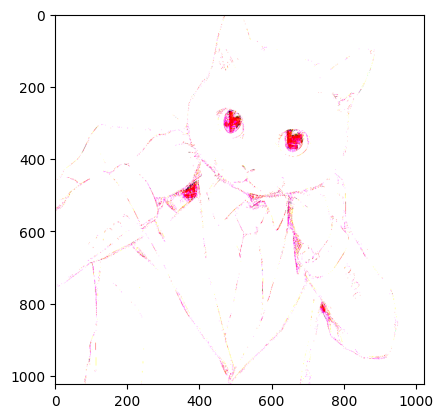

In [23]:
plt.imshow(array);

## Dropout

In [25]:
model = Sequential()
model.add(Flatten(input_shape=x_train.shape[1:]))
model.add(Dropout(rate=0.2))
model.add(Dense(300, activation="elu", kernel_initializer="he_normal"))
model.add(Dropout(rate=0.2))
model.add(Dense(100, activation="elu", kernel_initializer="he_normal"))
model.add(Dropout(rate=0.2))
model.add(Dense(10, activation="softmax"))

In [26]:
model.compile(loss=keras.losses.sparse_categorical_crossentropy, metrics=["accuracy"], optimizer="adam")

In [27]:
history = model.fit(x_train, y_train, epochs=30, validation_data=(x_test, y_test))

Epoch 1/30
1875/1875 [==============================] - 7s 3ms/step - loss: 3.6701 - accuracy: 0.4877 - val_loss: 0.7771 - val_accuracy: 0.7755
Epoch 2/30
1875/1875 [==============================] - 6s 3ms/step - loss: 1.0163 - accuracy: 0.6964 - val_loss: 0.4803 - val_accuracy: 0.8702
Epoch 3/30
1875/1875 [==============================] - 6s 3ms/step - loss: 0.7400 - accuracy: 0.7783 - val_loss: 0.3410 - val_accuracy: 0.9024
Epoch 4/30
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5394 - accuracy: 0.8406 - val_loss: 0.2476 - val_accuracy: 0.9302
Epoch 5/30
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4489 - accuracy: 0.8731 - val_loss: 0.2072 - val_accuracy: 0.9482
Epoch 6/30
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3731 - accuracy: 0.9001 - val_loss: 0.1778 - val_accuracy: 0.9500
Epoch 7/30
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3331 - accuracy: 0.9133 - val_loss: 0.1936 - val_accuracy:

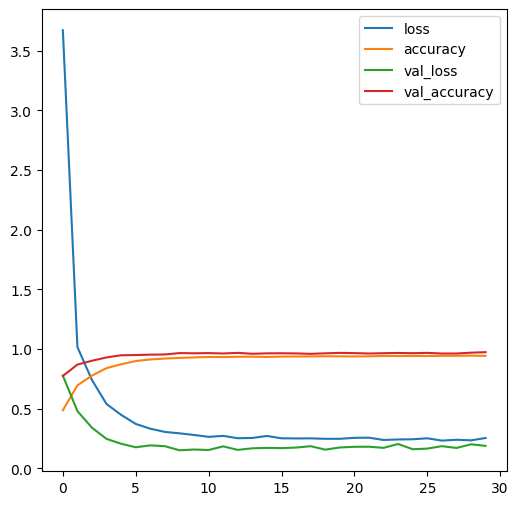

In [29]:
pd.DataFrame(history.history).plot(figsize=(6, 6));

## Exercícios

In [30]:
from keras.datasets import cifar10

In [51]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [52]:
x_train.shape

(50000, 32, 32, 3)

In [53]:
y_train.shape

(50000, 1)

In [54]:
x_test.shape

(10000, 32, 32, 3)

In [55]:
y_test.shape

(10000, 1)

In [97]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

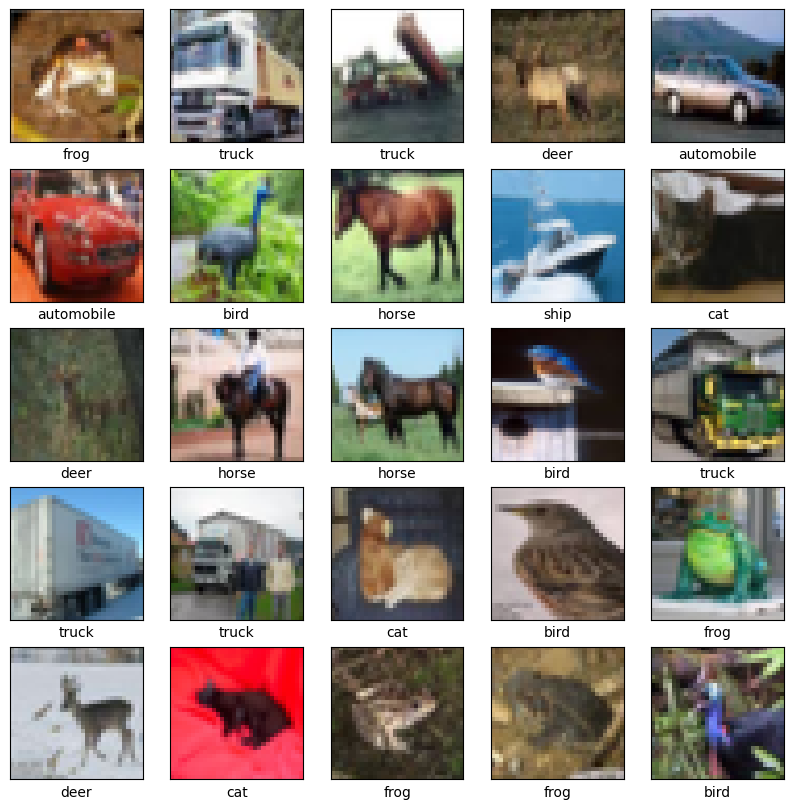

In [98]:
plt.figure(figsize=[10,10])
for i in range (25):    # for first 25 images
  plt.subplot(5, 5, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(x_train[i], cmap=plt.cm.binary)
  plt.xlabel(class_names[y_train[i][0]])

plt.show()

In [101]:
train_images = x_train.astype('float32')
test_images = x_test.astype('float32')
 
# Standardizing (255 is the total number of pixels an image can have)
train_images = train_images / 255
test_images = test_images / 255 


In [105]:
train_images.shape

(50000, 32, 32, 3)

In [106]:
from tensorflow.keras import layers

## Sample

In [124]:
class Model(object):
    def __init__(self,units=100, hidden=20, activation="elu", 
                 kernel_initializer="he_normal", save_loss=True,
                 epochs=10,input_shape=(32,32,3), is_train=False, directory="models", **kwargs):
        super().__init__(**kwargs)
        self.units = units
        self.hidden = hidden
        self.activation = activation
        self.kernel_initializer = kernel_initializer
        self.save_loss = save_loss
        self.epochs = epochs
        self.input_shape = input_shape
        self.is_train = is_train
        self.directory = directory


    def build_model(self) -> None:
        self.model = Sequential()
        self.model.add(layers.Conv2D(32, (3,3), padding='same', activation=self.activation, input_shape=self.input_shape))
        self.model.add(layers.BatchNormalization())
        self.model.add(layers.Conv2D(32, (3,3), padding='same', activation=self.activation))
        self.model.add(layers.BatchNormalization())
        self.model.add(layers.MaxPooling2D(pool_size=(2,2)))
        self.model.add(layers.Dropout(0.3))
        self.model.add(Flatten())
        self.model.add(Dropout(0.2))
        for _ in range(self.hidden):
            self.model.add(Dense(self.units, activation=self.activation, kernel_initializer=self.kernel_initializer))
            self.model.add(Dropout(0.2))
            self.model.add(BatchNormalization())
        self.model.add(Dense(10, activation="softmax"))


    def compile_model(self) -> None:
        self.model.compile(loss=keras.losses.sparse_categorical_crossentropy, metrics=["accuracy"], optimizer="adam")


    def train_model(self, x_train, y_train, x_test, y_test) -> None:
        self.history = self.model.fit(x_train, y_train, epochs=self.epochs, validation_data=(x_test, y_test))


    def evaluate_model(self, x_test, y_test) -> None:
        self.eval = self.model.evaluate(x_test, y_test)

    def save_model(self):
        self.model.save_model(f"{self.directory}/model.h5")

    def load_model(self):
        self.model = keras.models.load_model(f"{self.directory}/model.h5")


    def train(self, x_train, y_train, x_test, y_test):
        self.build_model(x_train)
        self.compile_model()
        if self.is_train:
            self.train_model(x_train, y_train, x_test, y_test)
            self.save_model()
        else:
            self.load_model()
        self.evaluate_model(x_test, y_test)
        return self.model, self.history
    

In [125]:
model = Model(epochs=30).train(x_train, y_train, x_test, y_test)

Epoch 1/30
1563/1563 [==============================] - 68s 37ms/step - loss: 2.1744 - accuracy: 0.1824 - val_loss: 2.3912 - val_accuracy: 0.1854
Epoch 2/30
1563/1563 [==============================] - 59s 38ms/step - loss: 1.7901 - accuracy: 0.3028 - val_loss: 1.8368 - val_accuracy: 0.3117
Epoch 3/30
1563/1563 [==============================] - 60s 38ms/step - loss: 1.6482 - accuracy: 0.3694 - val_loss: 1.4913 - val_accuracy: 0.4169
Epoch 4/30
1563/1563 [==============================] - 56s 36ms/step - loss: 1.5325 - accuracy: 0.4244 - val_loss: 1.4507 - val_accuracy: 0.4710
Epoch 5/30
1563/1563 [==============================] - 61s 39ms/step - loss: 1.4699 - accuracy: 0.4573 - val_loss: 1.3615 - val_accuracy: 0.5036
Epoch 6/30
1563/1563 [==============================] - 57s 36ms/step - loss: 1.4141 - accuracy: 0.4911 - val_loss: 1.2544 - val_accuracy: 0.5425
Epoch 7/30
1563/1563 [==============================] - 56s 36ms/step - loss: 1.3705 - accuracy: 0.5218 - val_loss: 1.3194 -